In [ ]:
import pandas as pd

df = pd.read_csv("raw_kaggle_data.csv")

print(df.head())

    price  area              status  bhk  bathroom  age    location  \
0   37.49   872       Ready to move    2       NaN  1.0   Sembakkam   
1   93.54  1346  Under Construction    3       2.0  NaN    Selaiyur   
2  151.00  2225  Under Construction    3       NaN  0.0   Mogappair   
3   49.00  1028       Ready to move    2       2.0  3.0    Ambattur   
4   42.28   588  Under Construction    2       1.0  0.0  Pallavaram   

                                builder  
0                         MP Developers  
1                         DAC Promoters  
2     Casagrand Builder Private Limited  
3                Dugar Housing Builders  
4  Radiance Realty Developers India Ltd  


In [ ]:
print(df.shape)

(2620, 8)
Index(['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'location',
       'builder'],
      dtype='object')


In [5]:
print(df.columns)

Index(['price', 'area', 'status', 'bhk', 'bathroom', 'age', 'location',
       'builder'],
      dtype='object')


In [ ]:
df.info()
df.describe()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


,price,area,bhk,bathroom,age
count,2620.000000,2620.000000,2620.000000,1403.000000,1729.000000
mean,93.834683,1282.925191,2.443893,2.359230,1.355119
std,113.609349,692.566319,0.811984,0.844951,2.102682
min,12.830000,300.000000,1.000000,1.000000,0.000000
25%,42.000000,877.000000,2.000000,2.000000,0.000000
50%,61.735000,1091.500000,2.000000,2.000000,0.000000
75%,90.000000,1471.250000,3.000000,3.000000,3.000000
max,1422.000000,6700.000000,8.000000,7.000000,32.000000


In [ ]:
df.isnull().sum()                                                                                   # Check for missing values


price          0
area           0
status         0
bhk            0
bathroom    1217
age          891
location       0
builder        0
dtype: int64

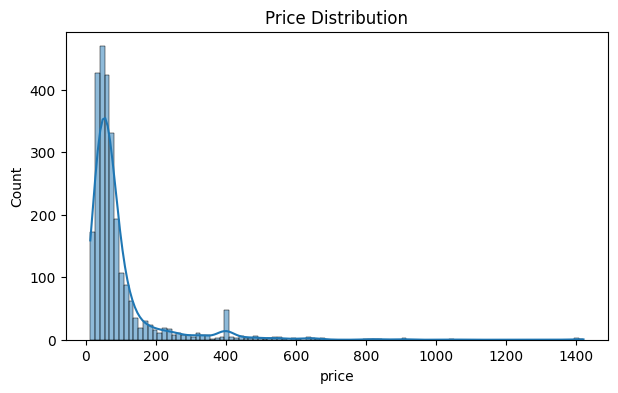

In [ ]:
plt.figure(figsize=(7,4))                                                                             # Price Distribution Plot
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()


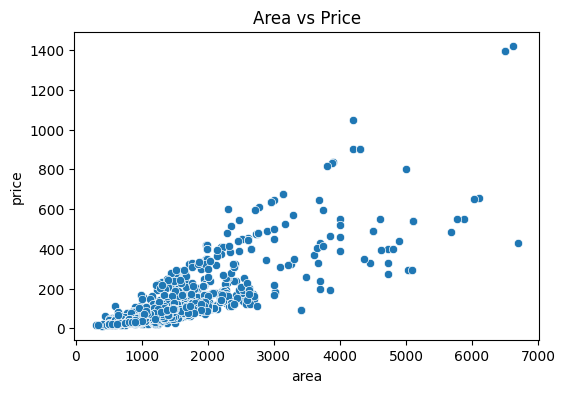

In [ ]:
plt.figure(figsize=(6,4))                                                                               # area vs price scatter plot
sns.scatterplot(x='area', y='price', data=df)
plt.title("Area vs Price")
plt.show()


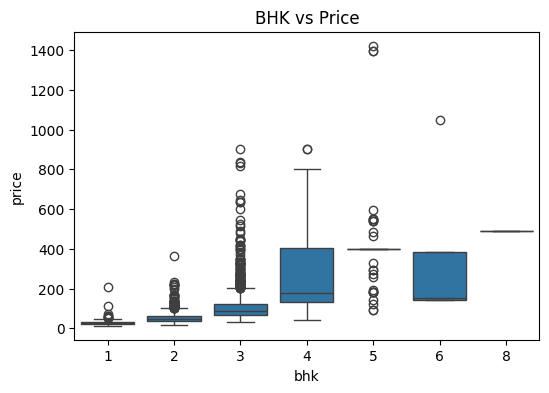

In [ ]:
plt.figure(figsize=(6,4))                                                                    # bhk vs price box plot                
sns.boxplot(x='bhk', y='price', data=df)
plt.title("BHK vs Price")
plt.show()


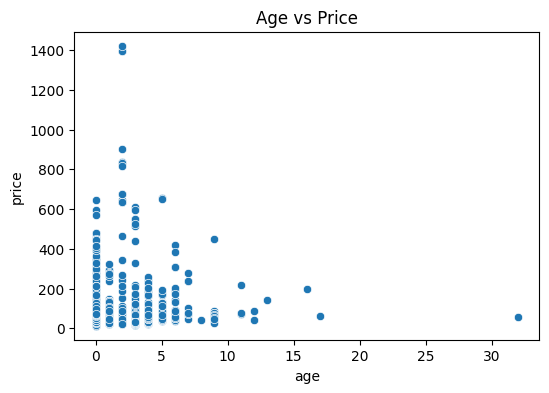

In [ ]:
plt.figure(figsize=(6,4))                                                                            # age vs price scatter plot                                                
sns.scatterplot(x='age', y='price', data=df)
plt.title("Age vs Price")
plt.show()


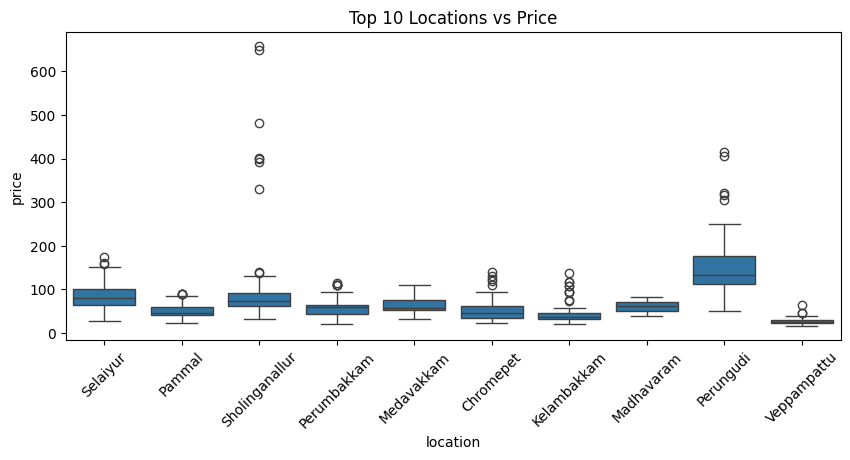

In [ ]:
top_locations = df['location'].value_counts().head(10).index                                           # location vs price box plot for top 10 locations
plt.figure(figsize=(10,4))
sns.boxplot(x='location', y='price', data=df[df['location'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title("Top 10 Locations vs Price")
plt.show()


In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower) | (df['price'] > upper)]
outliers.shape


(299, 8)

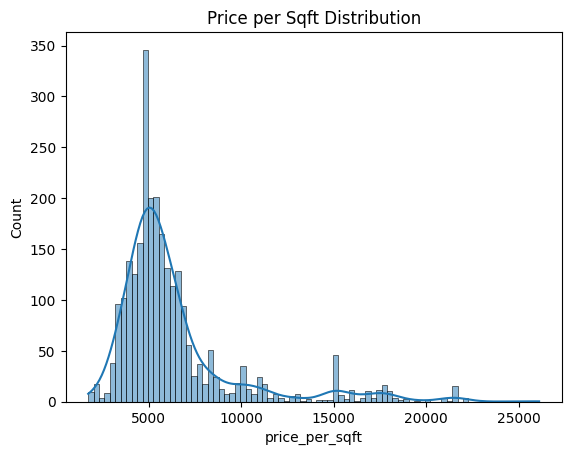

In [17]:
df['price_per_sqft'] = (df['price'] * 100000) / df['area']

sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Price per Sqft Distribution")
plt.show()


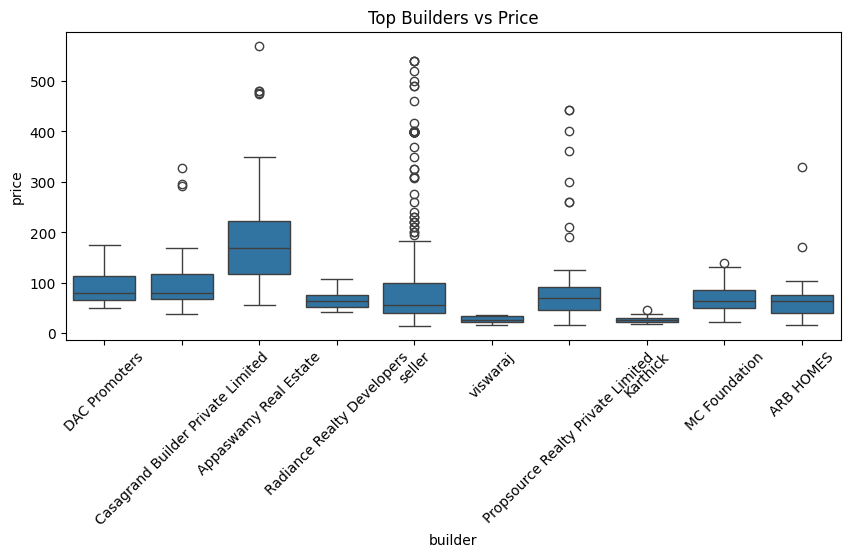

In [18]:
top_builders = df['builder'].value_counts().head(10).index

plt.figure(figsize=(10,4))
sns.boxplot(x='builder', y='price', data=df[df['builder'].isin(top_builders)])
plt.xticks(rotation=45)
plt.title("Top Builders vs Price")
plt.show()


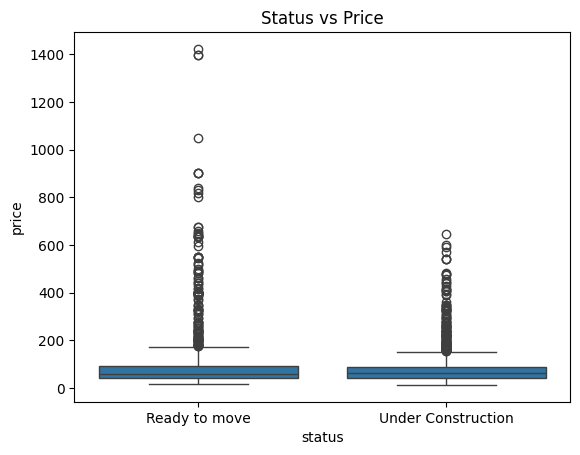

In [19]:
sns.boxplot(x='status', y='price', data=df)
plt.title("Status vs Price")
plt.show()


In [21]:
import numpy as np

numeric_df = df.select_dtypes(include=['int64','float64'])

corr = numeric_df.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper[upper > 0.85].dropna(how='all')


,price,area,bhk,bathroom,age,price_per_sqft
bhk,NaN,NaN,NaN,0.861279,NaN,NaN
